### Nama : Wilson Boyaron Hutagalung
### Nim  : 2209106035
### Kelas: Praktikum KB A2 2022
### POSTTEST 5

## Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score

## Melihat bentuk dari dataset yang digunakan

In [3]:
df = pd.read_csv("brain_stroke.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## Menampilkan 5 data Teratas

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Pengecekan apakah terdapat Data Kosong

In [5]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Data Preprocessing 

In [6]:
#Melakukan normalisasi data
min_max_scaler = MinMaxScaler()
df[['avg_glucose_level', 'bmi']] = min_max_scaler.fit_transform(df[['avg_glucose_level', 'bmi']])

# Menghapus kolom yang tidak diperlukan , agar hanya memakai data bertipe int46 dan float
df.drop(['ever_married'], axis=1, inplace=True)
df.drop(['work_type'], axis=1, inplace=True)
df.drop(['Residence_type'], axis=1, inplace=True)
df.drop(['gender'], axis=1, inplace=True)
df.drop(['smoking_status'], axis=1, inplace=True)

df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,0.801265,0.647564,1
1,80.0,0,1,0.234512,0.530086,1
2,49.0,0,0,0.536008,0.584527,1
3,79.0,1,0,0.549349,0.286533,1
4,81.0,0,0,0.605161,0.429799,1


## A. Surpervised Learning

### 1. Support Vector Classifier

In [7]:
# Memisahkan atribut dan label
X_svm = df[['avg_glucose_level', 'bmi']]
y_svm = df['stroke']

# Membagi data (split) ke train_set dan test_set
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

# Membuat model SVC lalu dilatih menggunakan data train
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# Memprediksi data test dengan model
y_pred = svm.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
# Menyimpan nilai Support Vectors & Indexnya
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))
support_vector_indices

(array([   0,    2,    3,    9,   16,   27,   36,   39,   45,   48,   55,
          65,   78,   81,   87,  101,  114,  120,  153,  154,  158,  178,
         180,  184,  193,  205,  214,  218,  227,  232,  234,  248,  255,
         258,  262,  265,  289,  305,  315,  325,  337,  341,  346,  360,
         365,  369,  376,  378,  379,  390,  407,  412,  429,  431,  434,
         439,  444,  458,  466,  475,  480,  484,  499,  507,  513,  520,
         528,  538,  565,  577,  585,  588,  597,  602,  604,  609,  625,
         628,  644,  653,  657,  658,  660,  670,  675,  692,  693,  701,
         712,  724,  736,  743,  744,  749,  768,  776,  781,  790,  836,
         846,  850,  851,  858,  859,  864,  868,  884,  893,  897,  905,
         908,  931,  935,  940,  942,  943,  954,  959,  975,  980,  984,
         986,  992, 1012, 1023, 1027, 1032, 1054, 1069, 1070, 1086, 1089,
        1090, 1097, 1102, 1107, 1123, 1125, 1139, 1140, 1174, 1181, 1206,
        1212, 1221, 1223, 1230, 1240, 

### Hasil Prediksi SVM Menggunakan Confusion_Matrix

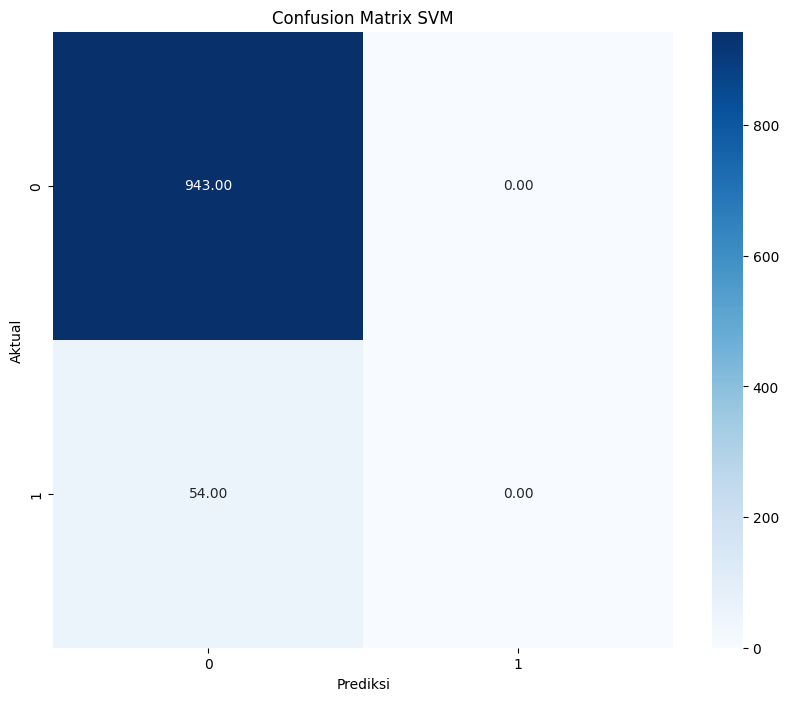

In [10]:
svm_cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix SVM')
plt.show()

### Evaluasi Klasifikasi Metode Support Vector Machine

In [11]:
print("accuracy score menggunakan SVM =",accuracy_score(y_test,y_pred,),'\n')
print(classification_report(y_test, y_pred))

accuracy score menggunakan SVM = 0.9458375125376128 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



c:\Users\fx506\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fx506\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fx506\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### 2. Metode Random Forrest Classifier

In [12]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
rfc = RandomForestClassifier(n_estimators=500, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [14]:
rf = RandomForestClassifier(n_estimators=200, random_state=30)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

### Hasil Prediksi Random Forest Classifier Menggunakan Confusion_Matrix

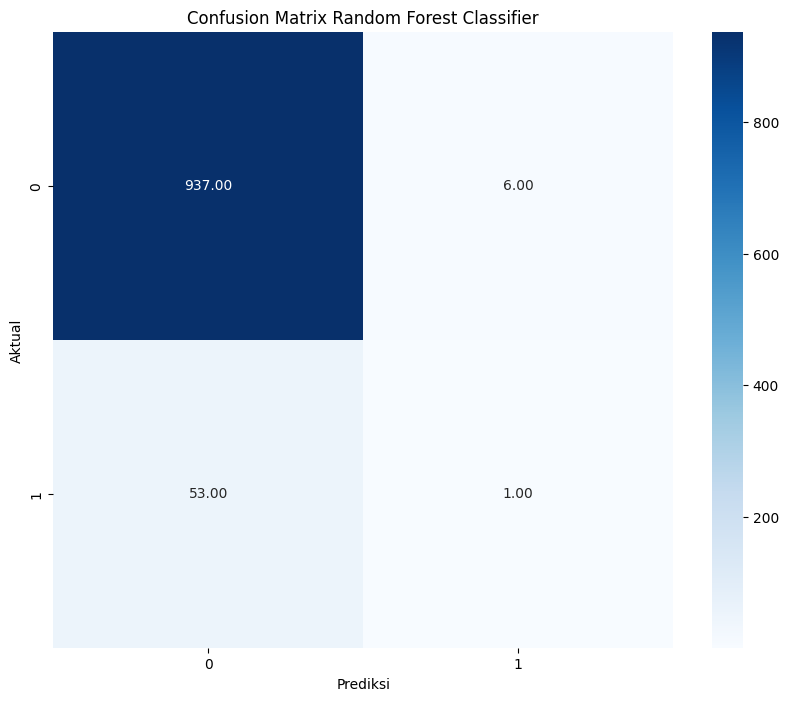

In [15]:
rf_cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(rf_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest Classifier')
plt.show()

### Evaluasi Klasifikasi Metode Random Forest

In [16]:
print("accuracy score menggunakan Random Forest =",accuracy_score(y_test,y_pred,),'\n')
print(classification_report(y_test, y_pred))

accuracy score menggunakan Random Forest = 0.9408224674022067 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.14      0.02      0.03        54

    accuracy                           0.94       997
   macro avg       0.54      0.51      0.50       997
weighted avg       0.90      0.94      0.92       997



### 3. Metode K-Nearest Neighbors

In [17]:
# Inisialisasi model K-Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=2)
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

## Hasil Prediksi KNN Menggunakan Confusion_Matrix

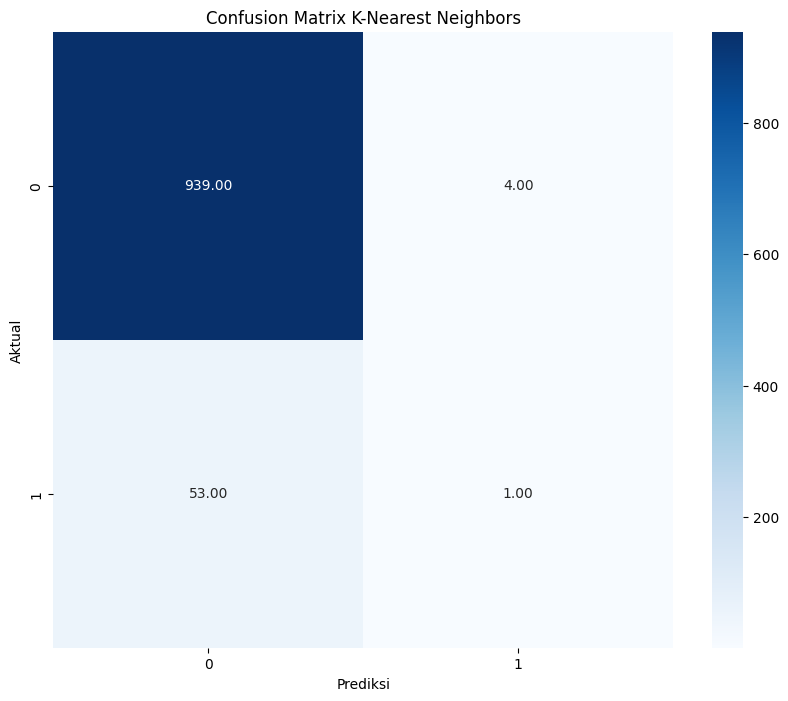

In [19]:
KNN_cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(KNN_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix K-Nearest Neighbors')
plt.show()

### Evaluasi Klasifikasi Metode K-Nearest Neighbors

In [20]:
print("accuracy score menggunakan KNN =",accuracy_score(y_test,y_pred,),'\n')
print(classification_report(y_test, y_pred))

accuracy score menggunakan KNN = 0.9428284854563691 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.20      0.02      0.03        54

    accuracy                           0.94       997
   macro avg       0.57      0.51      0.50       997
weighted avg       0.91      0.94      0.92       997



<li>Kesimpulan dari Berbagai Metode Yang telah diuji
Support Vector Classifier memiliki akurasi yang lebih baik dibandingkan dengan Random Forest Classifier dan K-Nearest Neighbors.

### A3. Plotting Hasil Prediksi SVM

c:\Users\fx506\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


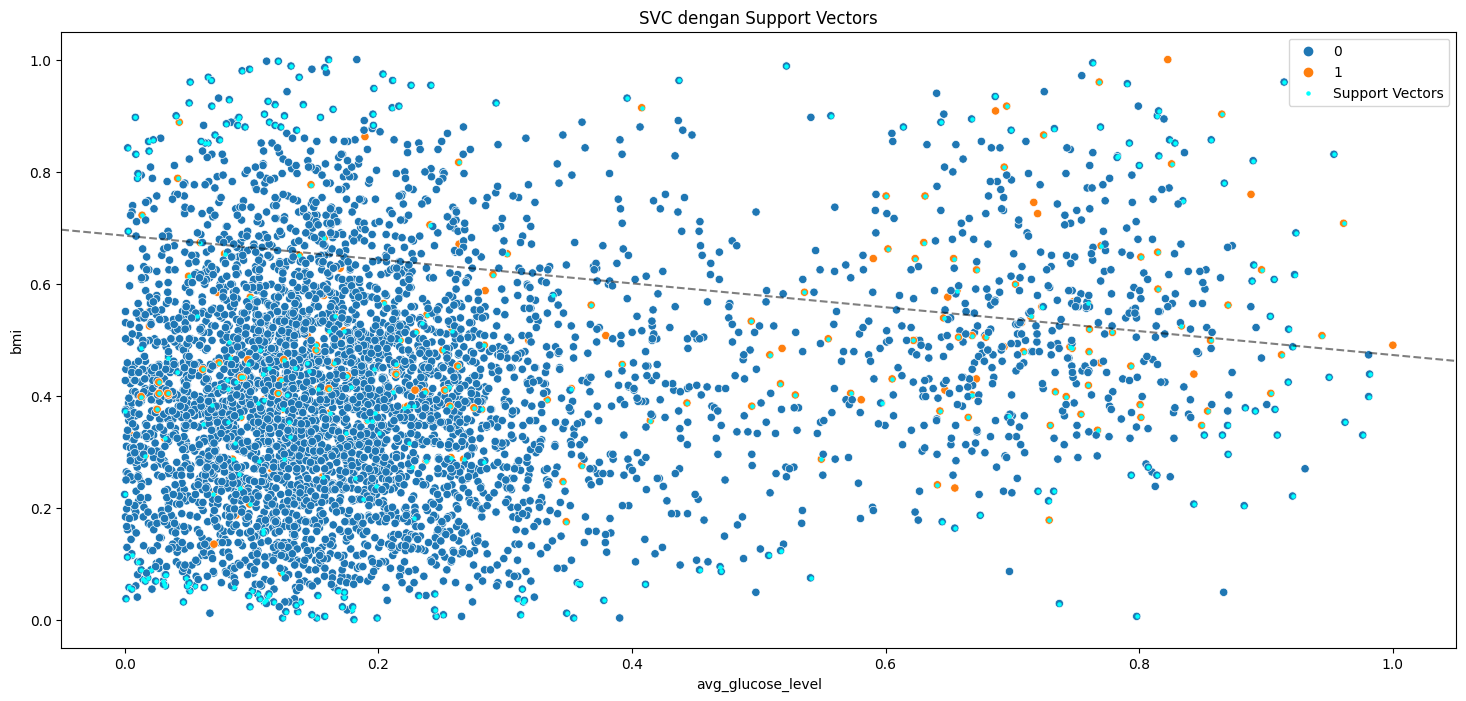

In [21]:
plt.figure(figsize=(18,8))

sns.scatterplot(x='avg_glucose_level', y='bmi', data=df, hue='stroke')

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=5, color='cyan', marker='o', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x

# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('avg_glucose_level')
plt.ylabel('bmi')
plt.legend(loc='upper right')
plt.title('SVC dengan Support Vectors')
plt.show()

## B. Unsupersived Learning

### B1. Implementasi metode K-Means pada dataset

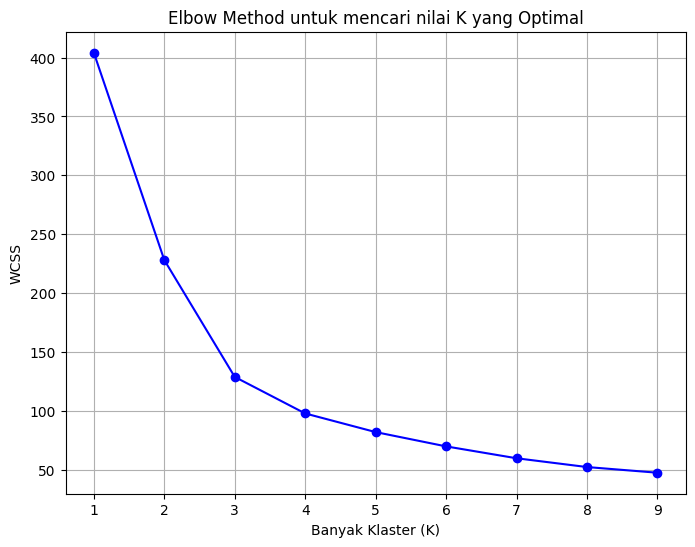

In [22]:
X_KM = df[['avg_glucose_level', 'bmi']]
wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok
# Buat loop untuk melatih algoritma K-Means
for k in range(1, 10):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X_KM)
    wcss.append(model.inertia_)
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

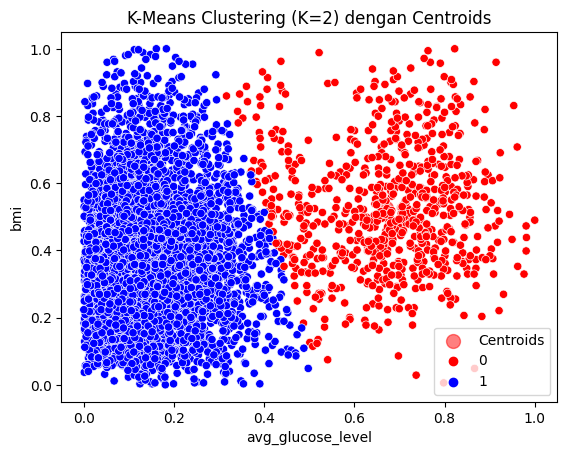

In [23]:
X_KM = df[['avg_glucose_level', 'bmi']] # Gunakan fitur X
K = 2 # Pilih angka banyaknya kelompok (K)
kmeans = KMeans(n_clusters=K, n_init=10) # Inisialisasi K-Means
kmeans.fit(X_KM) # Latih model K-Means berdasarkan data X
cluster_labels = kmeans.labels_ # Label kelompok dari model
df["cluster"] = cluster_labels # Tambahkan kolom prediksi
centroids = kmeans.cluster_centers_ # Titik pusat kelompok dari model
# Visualisasikan kelompok (kluster) data Iris
warna = ["red", "blue"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,
            label='Centroids')
sns.scatterplot(data=df, x="avg_glucose_level", y="bmi",hue="cluster", palette=warna)
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("avg_glucose_level")
plt.ylabel("bmi")
plt.legend()
plt.show()

## B2. Mengevaluasi cluster yang telah diprediksi 

### Evaluasi Clustering tanpa Label Asli

In [24]:
ss_score = silhouette_score(X_KM, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X_KM, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X_KM, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.55
Davies-Bouldin Index: 0.73
Calinski-Harabasz Index: 3844.66


### Evaluasi Clustering dengan Label Asli

In [25]:
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["stroke"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
stroke      0    1
cluster           
0         649   90
1        4084  158 



In [26]:
# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df['cluster'], df['stroke'])
print(f"Adjusted Rand Index (ARI): {ari:.5f}")

# Normalized Mutual Information (NMI)
nmi = normalized_mutual_info_score(df['stroke'], df['cluster'])
print(f"Normalized Mutual Information (NMI): {nmi:.5f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(df['stroke'], df['cluster'])
completeness = completeness_score(df['stroke'], df['cluster'])
v_measure = v_measure_score(df['stroke'], df['cluster'])

print(f"Homogeneity: {homogeneity:.5f}")
print(f"Completeness: {completeness:.5f}")
print(f"V-Measure: {v_measure:.5f}")

Adjusted Rand Index (ARI): 0.09336
Normalized Mutual Information (NMI): 0.02409
Homogeneity: 0.03760
Completeness: 0.01772
V-Measure: 0.02409


## B3. Membuat Plot Hasil Clusteringnya

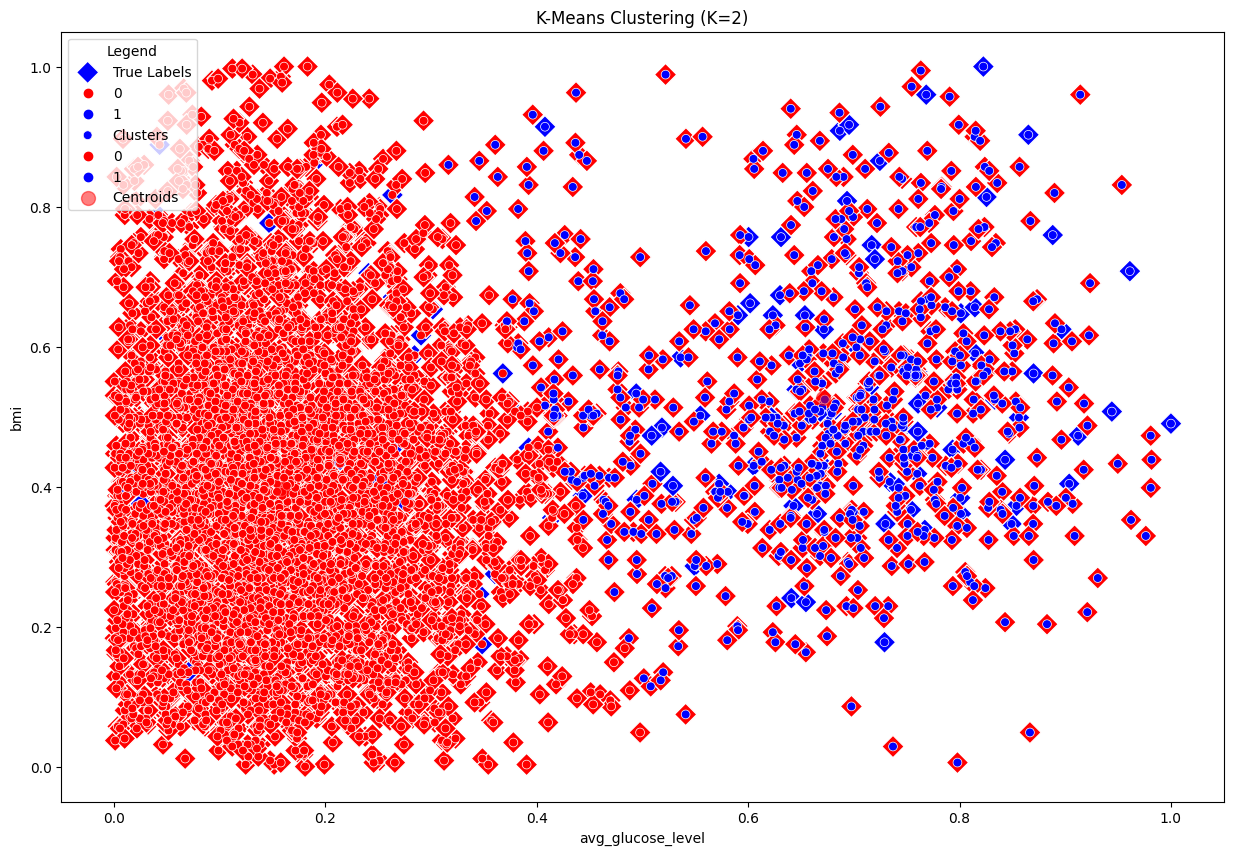

In [27]:
cluster_mapping = {0: 1, 1: 0, 2: 2}
df["cluster2"] = df["cluster"].map(cluster_mapping)

plt.figure(figsize=(15,10))
warna = ["red", "blue"]
sns.scatterplot(df, x='avg_glucose_level', y='bmi', palette=warna,
                hue=df['stroke'], marker="D", s=130, label="True Labels")


sns.scatterplot(df, x='avg_glucose_level', y='bmi', palette=warna,
                hue="cluster2", marker="o", s=40, label="Clusters")
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')

plt.title("K-Means Clustering (K=2)")
plt.xlabel('avg_glucose_level')
plt.ylabel('bmi')
plt.legend(title="Legend", loc="upper left")
plt.show()